In [1]:
options(repr.plot.width=8, repr.plot.height=5) #set a common width/height for plots

## Exercise 1
The time it takes a student to complete a TOLC-I University orientation and evaluation test follows a density function of the form:

$$f(X) = \begin{cases}
c(t-1)(2-t) & 1 < t < 2\\
0 & \text{otherwise}
\end{cases}$$
where $t$ is the time in hours.

a) Using the `integrate()` R function, determine the constant $c$ (and verify it analytically)

By normalization:
$$1 \overset{!}{=} \int_1^2 \mathrm{d}t \> c(t-1)(2-t) \Leftrightarrow c^{-1} = \int_1^2 \mathrm{d}t\> (t-1)(2-t) = \left[-2t + \frac{3}{2} t^2 - \frac{t^3}{3} \right]_{t=1}^{t=2} = \frac{1}{6}  $$
and so, analytically, $c=6$.

In [2]:
f <- function(t) {
    return(ifelse(1 < t & t < 2, (t-1) * (2-t), 0))
}

In [3]:
inv_c <- integrate(f, 1, 2)
c <- 1 / inv_c[['value']]
sprintf("c is %.2f", c)

[1] "c is 6.00"

b) Write the set of four R functions and plot the pdf and cdf, respectively

The CDF is:
$$ \mathrm{CDF}(q) = \int_{-\infty}^q \mathrm{d}t \> 6(t-1)(2-t) = \begin{cases}
0 & q \leq 1\\
-(q-1)^2  (2q - 5) & 1 < q \leq 2\\
1 & q > 2
\end{cases} $$

In [4]:
dfunc1 <- function(x) { #PDF
    return(ifelse(1 < x & x < 2, 6 * (x-1) * (2-x), 0))
}

pfunc1 <- function(q) { #CDF
    return(ifelse(q <= 1, 0,
           ifelse(1 < q & q < 2, -(q - 1)^2 * (2*q - 5), 1)))
}

qfunc1 <- function(p) { #Quantile
    roots <- sapply(p, function(pbar) uniroot(function(x, pbar) {pfunc1(x) - pbar}, c(1,2), pbar=pbar)$root )
    
    return(roots)
}

rfunc1 <- function(n) { #Random generation
    u <- runif(n)
    return(qfunc1(u))
}

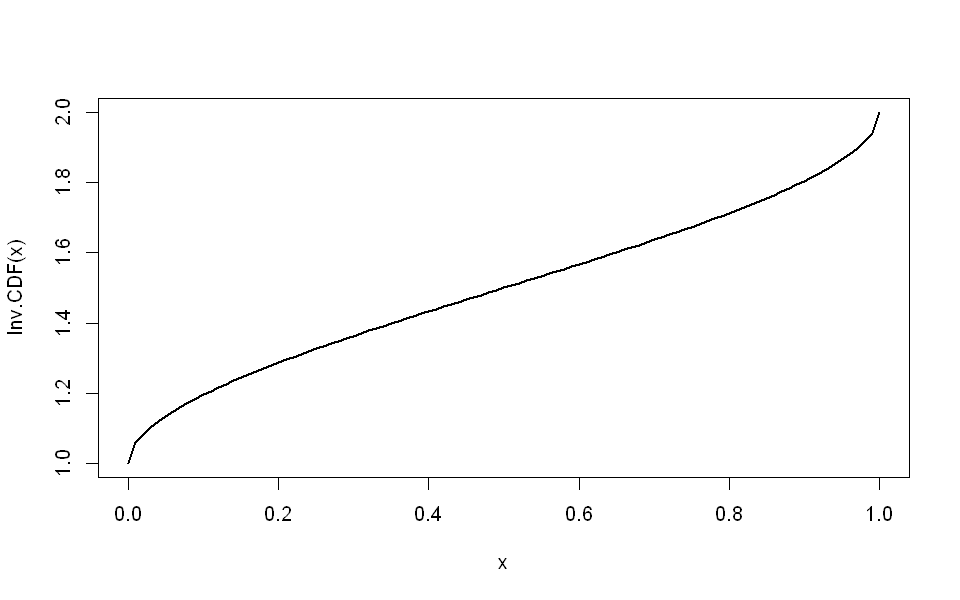

In [5]:
xs = seq(0,1, length.out=20)
plot(xs, qfunc1(xs), "n", xlab='x', ylab='Inv.CDF(x)')
curve(qfunc1(x), from=0, to=1, lwd=2, col = 'black', lty=1, add=TRUE)

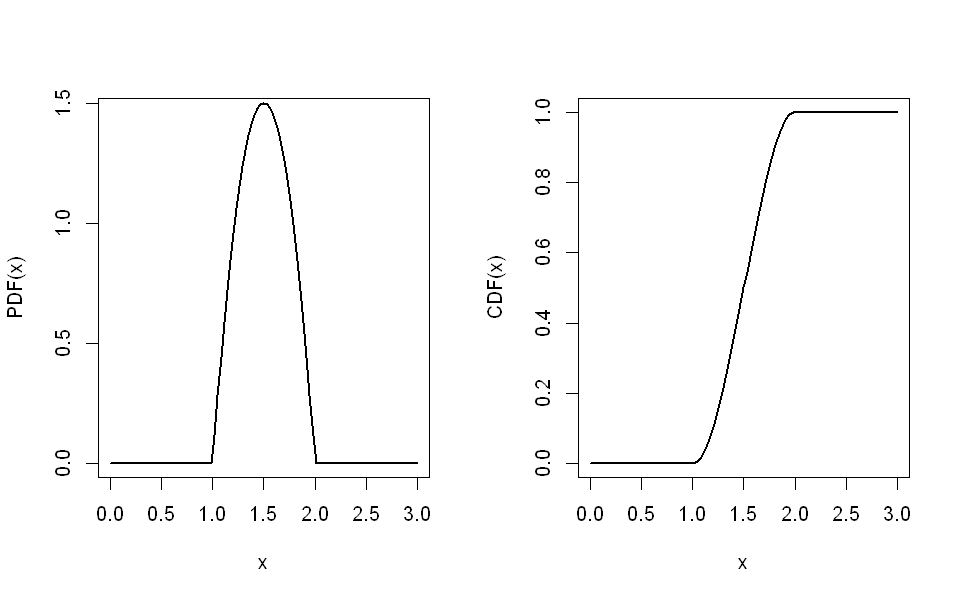

In [6]:
xs = seq(0,3, length.out=20)
par(mfrow=c(1,2))
plot(xs, dfunc1(xs), "n", xlab='x', ylab='PDF(x)')
curve(dfunc1(x), from=0, to=3, lwd=2, col = 'black', lty=1, add=TRUE)

plot(xs, pfunc1(xs), "n", xlab='x', ylab='CDF(x)')
curve(pfunc1(x), from=0, to=3, lwd=2, col = 'black', lty=1, add=TRUE)

c) Evaluate the probability that the student will finish the aptitude test in more than $75$ minutes. And that it will take between $90$ and $120$ minutes.

In [7]:
p_more_72_min <- 1 - pfunc1(75/60)
sprintf("Probability of a student finishing the test in more than 75 minutes = 1 - CDF(75 min) = %.2f", p_more_72_min)

p_between_90_and_120 <- pfunc1(120/60) - pfunc1(90/60)
sprintf("Probability of a student finishing the test in [90, 120] min = CDF(120 min) - CDF(90 min) = %.2f", p_between_90_and_120)

[1] "Probability of a student finishing the test in more than 75 minutes = 1 - CDF(75 min) = 0.84"

[1] "Probability of a student finishing the test in [90, 120] min = CDF(120 min) - CDF(90 min) = 0.50"

## Exercise 2
The lifetime of tires sold by an used tires shop is $10^4 \cdot x$ km, where $x$ is a random variable following the distribution function:
$$ f(X) = \begin{cases}
    2/x^2 & 1 < x < 2\\
    0 & \text{otherwise}
\end{cases} $$
a) Write the set of four R functions and plot the pdf and cdf, respectively.

In [8]:
dfunc2 <- function(x) { #PDF
    return(ifelse(1 < x & x < 2, 2 / (x^2), 0))
}

pfunc2 <- function(q) { #CDF
    return(ifelse(q <= 1, 0,
           ifelse(1 < q & q < 2, 2 - 2/q, 1)))
}

qfunc2 <- function(p) { #Quantile
    return(ifelse(0 < p & p < 1, 2 / (2 - p), NA))
}

rfunc2 <- function(n) { #Random generation
    u <- runif(n)
    return(qfunc2(u))
}

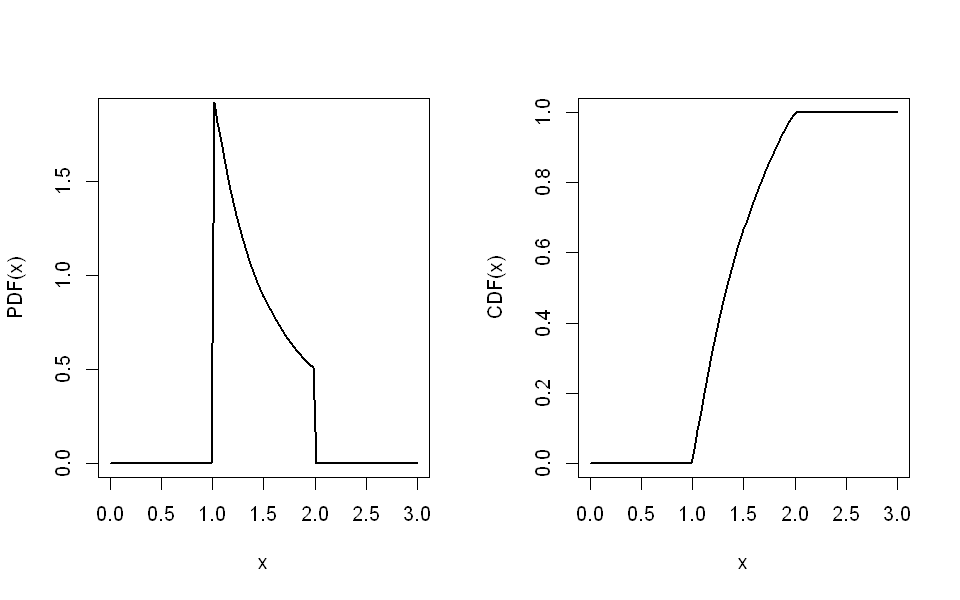

In [9]:
xs = seq(0,3, length.out=30)
par(mfrow=c(1,2))
plot(xs, dfunc2(xs), "n", xlab='x', ylab='PDF(x)')
curve(dfunc2(x), from=0, to=3, lwd=2, col = 'black', lty=1, add=TRUE)

plot(xs, pfunc2(xs), "n", xlab='x', ylab='CDF(x)')
curve(pfunc2(x), from=0, to=3, lwd=2, col = 'black', lty=1, add=TRUE)

b) Determine the probability that tires will last less than $15000$ km.

In [10]:
p_less_15000 <- pfunc2(15000 / 10000)
sprintf("Probabilities of tires lasting less than 15000 km: %.2f", p_less_15000)

[1] "Probabilities of tires lasting less than 15000 km: 0.67"

c) Sample $3000$ random variables from the distribution and determine the mean value and the variance, using the expression $\mathrm{Var}(X) = \mathrm{E}[X^2] - \mathrm{E}[X]^2$.

In [11]:
num <- 3000
samples <- rfunc2(num)

mean_value <- mean(samples)
mean_sq <- mean(samples^2)

variance <- mean_sq - mean_value^2

sprintf("Mean: %.2f; Variance: %.2f", mean_value, variance)

[1] "Mean: 1.38; Variance: 0.08"

## Exercise 3
Markov's inequality represents an upper bound to probability distributions:
$$P(X \geq k) \leq \frac{\mathrm{E}[X]}{k} \qquad \text{for }k > 0 $$
Having defined a function:
$$G(k) = 1-F(k) \equiv P(X \geq k) $$
plot $G(k)$ and the Markov's upper bound for:

a) the exponential, $\mathrm{Exp}(\lambda = 1)$, distribution function

In this case:
$$\mathrm{E}[X] = \frac{1}{\lambda} = 1$$

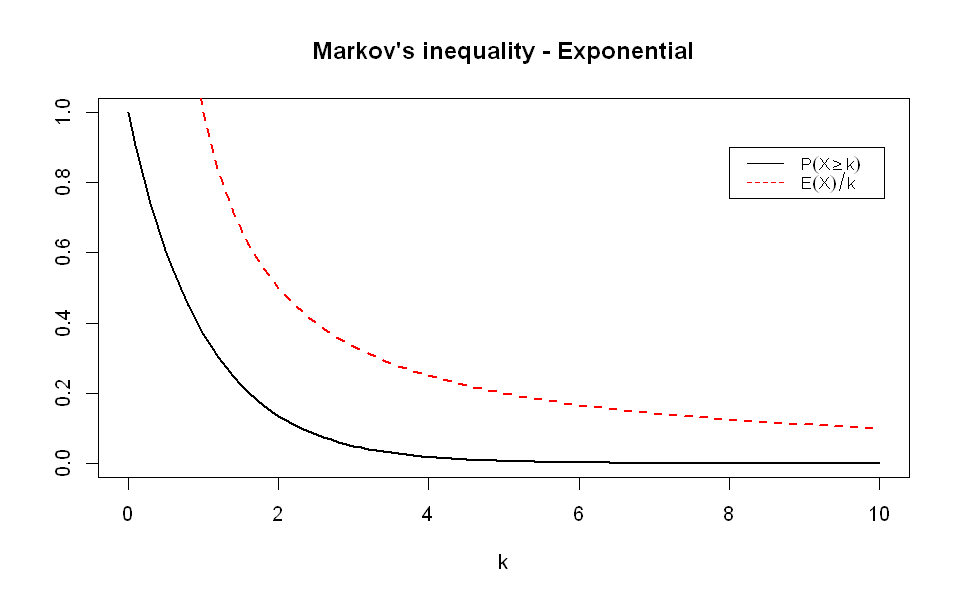

In [12]:
Gexp <- function(k) {
    return(1 - pexp(k, rate=1))
}

xs = seq(0, 10, length.out=100)
plot(xs, Gexp(xs), "n", xlab='k', ylab='', main="Markov's inequality - Exponential")
curve(Gexp, from=0, to=10, lwd=2, col = 'black', lty=1, add=TRUE)
curve(1/x, from=0, to=10, lwd=2, col = 'red', lty=2, add=TRUE)

legend(8, 0.9, legend=c(expression(P(X >= k)), expression(E(X) / k)),
       col=c("black", "red"), lty=c(1,2), cex=0.8, y.intersp=1.5)

b) The uniform, $\mathcal{U}(3,5)$, distribution function

In this case:
$$ \mathrm{E}[X] = \frac{a+b}{2} = \frac{3+5}{2} = 4$$

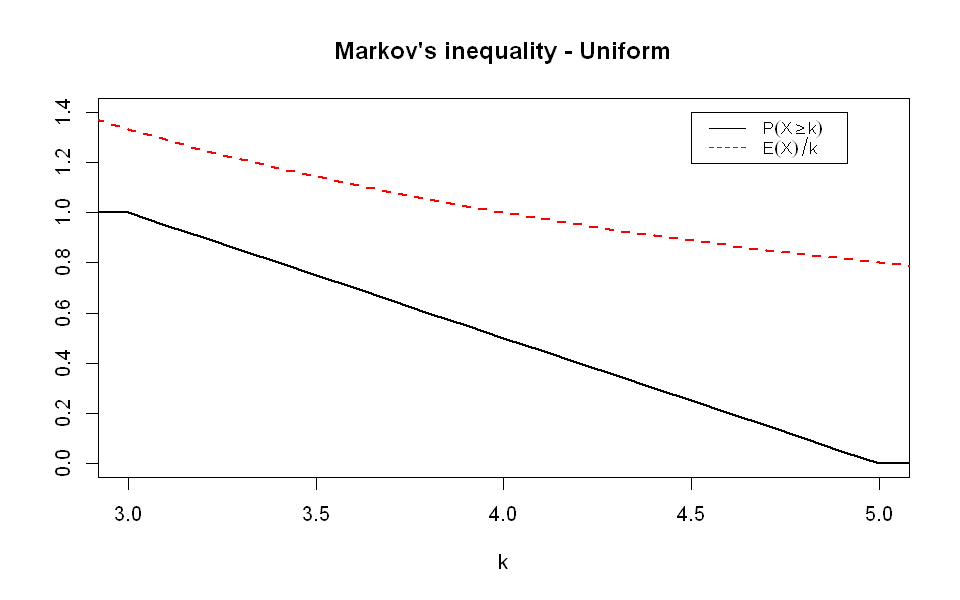

In [13]:
Gunif <- function(k) {
    return(1 - punif(k, min=3, max=5))
}

xs = seq(3, 5, length.out=100)
plot(0, 0, "n", xlab='k', ylab='', main="Markov's inequality - Uniform", xlim=c(3,5), ylim=c(0,1.4))
curve(Gunif, from=0, to=10, lwd=2, col = 'black', lty=1, add=TRUE)
curve((3+5)/(2*x), from=0, to=10, lwd=2, col = 'red', lty=2, add=TRUE)

legend(4.5, 1.4, legend=c(expression(P(X >= k)), expression(E(X) / k)),
       col=c("black", "red"), lty=c(1,2), cex=0.8, y.intersp=1.5)

c) The binomial, $\mathrm{Bin}(n=1, p=1/2)$, distribution function

In this case:
$$ \mathrm{E}[X] = n p = \frac{1}{2} $$

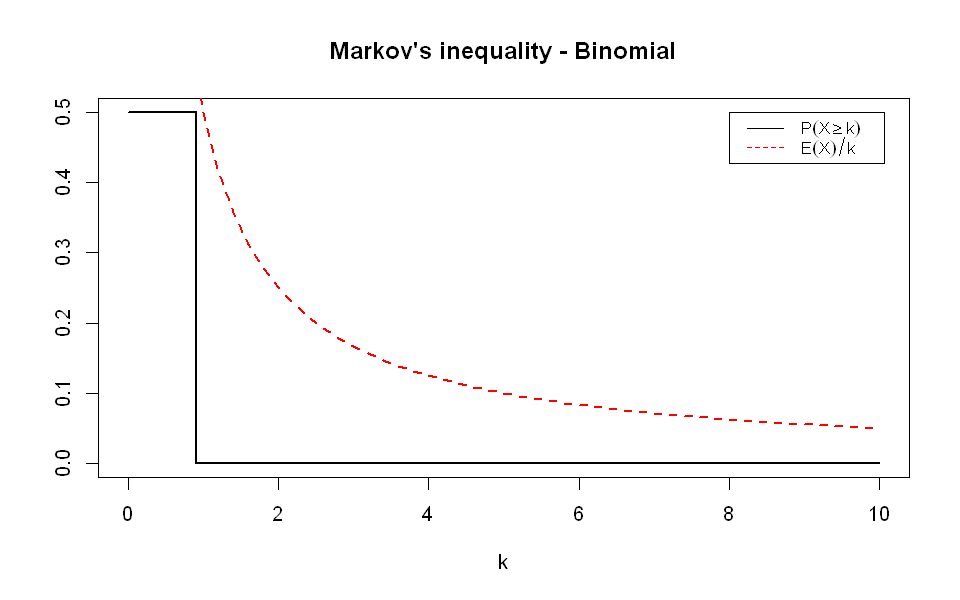

In [14]:
Gbinom <- function(k) {
    return(1 - pbinom(k, size = 1, prob = 1/2))
}

xs = seq(0, 10, length.out=100)
plot(xs, Gbinom(xs), "S", xlab='k', ylab='', main="Markov's inequality - Binomial", lwd=2)
#curve(Gbinom, from=0, to=10, lwd=2, col = 'black', lty=1, add=TRUE)
curve(1/(2*x), from=0, to=10, lwd=2, col = 'red', lty=2, add=TRUE)

legend(8, 0.5, legend=c(expression(P(X >= k)), expression(E(X) / k)),
       col=c("black", "red"), lty=c(1,2), cex=0.8, y.intersp=1.5)

d) a Poisson, $\mathrm{Pois}(\lambda = 1/2)$, distribution function

In this case:
$$ \mathrm{E}[X] = \lambda = \frac{1}{2} $$

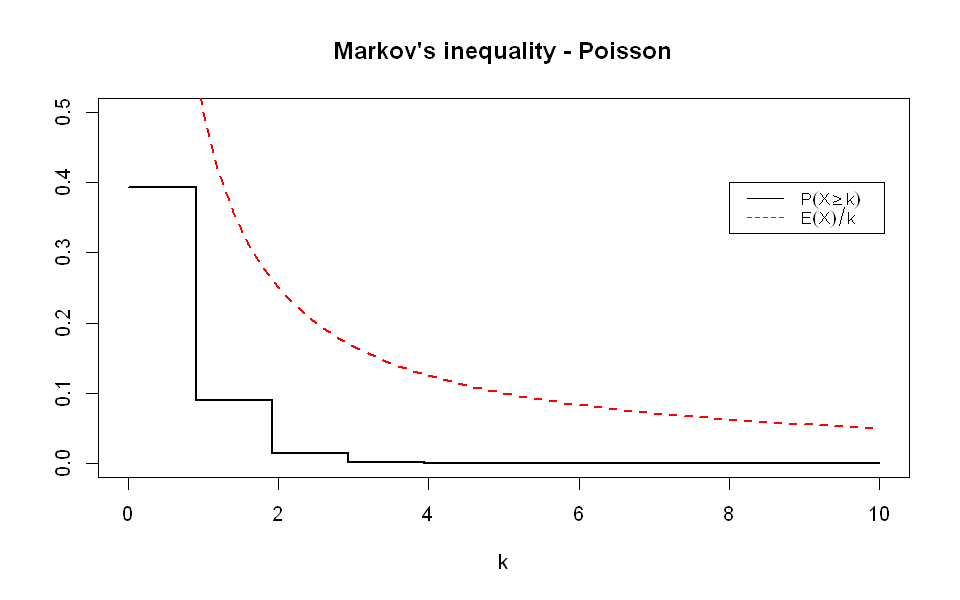

In [15]:
Gpois <- function(k) {
    return(1 - ppois(k, lambda = 1/2))
}

xs = seq(0, 10, length.out=100)
plot(xs, Gpois(xs), "S", xlab='k', ylab='', main="Markov's inequality - Poisson", ylim=c(0,0.5), lwd=2)
curve(1/(2*x), from=0, to=10, lwd=2, col = 'red', lty=2, add=TRUE)

legend(8, 0.4, legend=c(expression(P(X >= k)), expression(E(X) / k)),
       col=c("black", "red"), lty=c(1,2), cex=0.8, y.intersp=1.5)

## Exercise 4
Chebyshev's inequality tells us that:
$$P(|X - \mu| \geq k \sigma) \leq \frac{1}{k^2} $$
which can also be written as:
$$P(|X-\mu| < k\sigma) \geq 1 - \frac{1}{k^2} $$

Use R to show, with a plot, that Chebyshev's inequality is an upper bound to the following distributions:

a) a normal distribution, $\mathrm{N}(\mu = 3, \sigma=5)$

Rewriting:
$$ P(|X-\mu| < k \sigma) = P(-k\sigma < X-\mu < k \sigma) = P(-k\sigma + \mu < X < k \sigma + \mu) = \mathrm{CDF}(\mu + k\sigma) - \mathrm{CDF}(\mu - k\sigma) $$

In [16]:
lhs <- function(func, k, mu, sigma, ...) {
    return(func(mu + k * sigma, ...) - func(mu - k * sigma, ...))
}

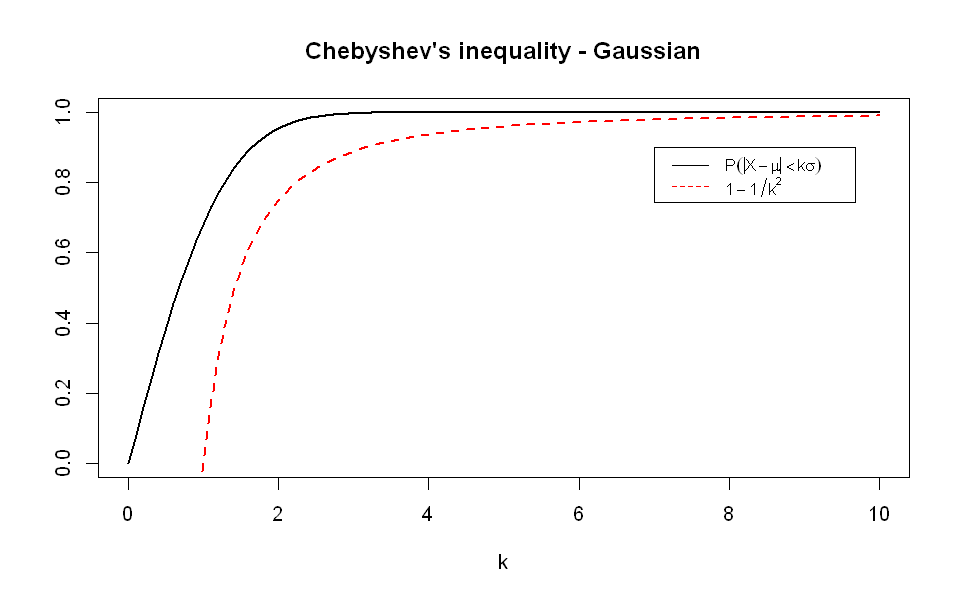

In [17]:
xs = seq(0, 10, length.out=100)
plot(xs, lhs(function(x) pnorm(x, mean=3, sd=5), xs, 3, 5), "l", col='black', xlab='k', ylab='',
     main="Chebyshev's inequality - Gaussian", lwd=2)
curve(1 - 1/(x^2), from=0, to=10, lwd=2, col = 'red', lty=2, add=TRUE)

legend(7, 0.9, legend=c(expression(P(abs(X- mu) < k * sigma)), expression(1 - 1/k^2)),
       col=c("black", "red"), lty=c(1,2), cex=0.8, y.intersp=1.5)

b) an exponential distribution, $\mathrm{Exp}(\lambda=1)$

In this case:
$$\mu = \frac{1}{\lambda} = 1; \qquad \sigma = \sqrt{\frac{1}{\lambda^2}} = 1 $$

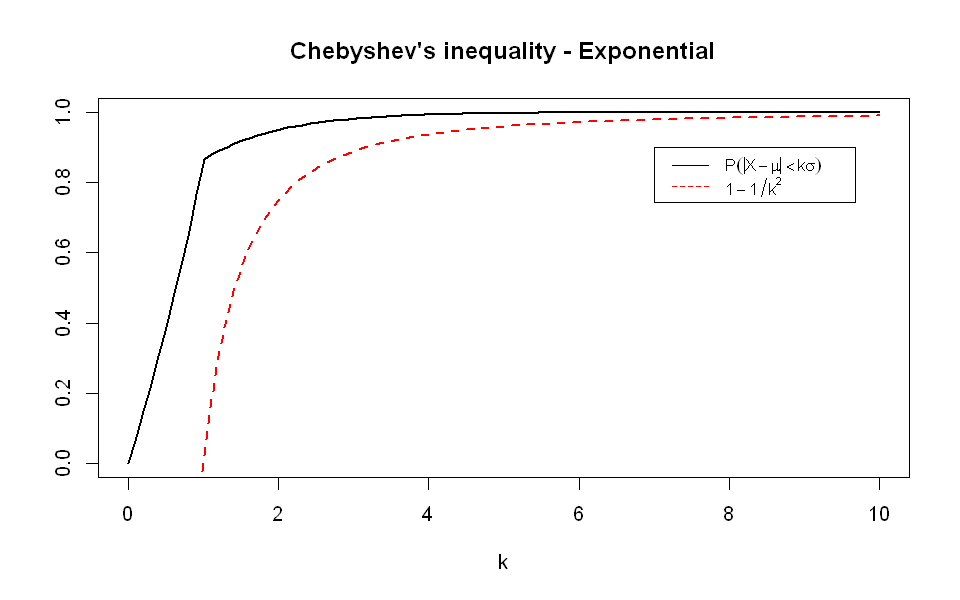

In [18]:
xs = seq(0, 10, length.out=100)
plot(xs, lhs(function(x) pexp(x, rate=1), xs, 1, 1), "l", col='black', xlab='k', ylab='', lwd=2,
     main="Chebyshev's inequality - Exponential")
curve(1 - 1/(x^2), from=0, to=10, lwd=2, col = 'red', lty=2, add=TRUE)

legend(7, 0.9, legend=c(expression(P(abs(X- mu) < k * sigma)), expression(1 - 1/k^2)),
       col=c("black", "red"), lty=c(1,2), cex=0.8, y.intersp=1.5)

c) a uniform distribution $\mathcal{U}(1-\sqrt{2}, 1 + \sqrt{2})$

In this case:
$$\mu = \frac{a+b}{2} = 1; \qquad \sigma = \sqrt{\frac{(b-a)^2}{12}} = \sqrt{\frac{2}{3}} $$

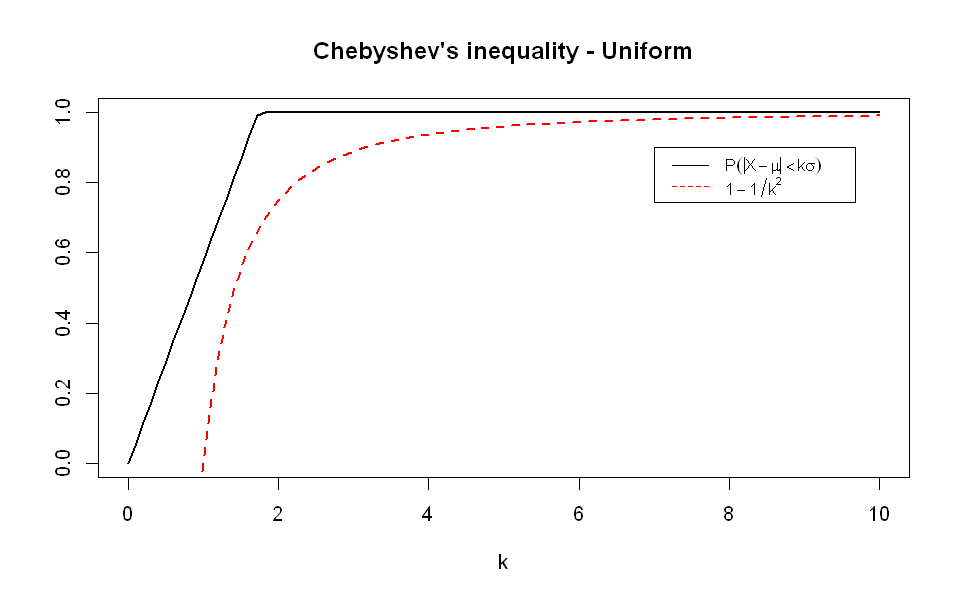

In [19]:
sigma <- sqrt(2/3)
xs = seq(0, 10, length.out=100)
plot(xs, lhs(function(x) punif(x, min=1-sqrt(2), max=1+sqrt(2)), xs, 1, sigma), "l", col='black', xlab='k', ylab='',
     lwd = 2, main = "Chebyshev's inequality - Uniform")
curve(1 - 1/(x^2), from=0, to=10, lwd=2, col = 'red', lty=2, add=TRUE)

legend(7, 0.9, legend=c(expression(P(abs(X- mu) < k * sigma)), expression(1 - 1/k^2)),
       col=c("black", "red"), lty=c(1,2), cex=0.8, y.intersp=1.5)

d) a Poisson, $\mathrm{Pois}(\lambda = 1/3)$, distribution function

In this case:
$$ \mu = \lambda = \frac{1}{3}; \qquad \sigma = \sqrt{\lambda} = \sqrt{\frac{1}{3}} $$

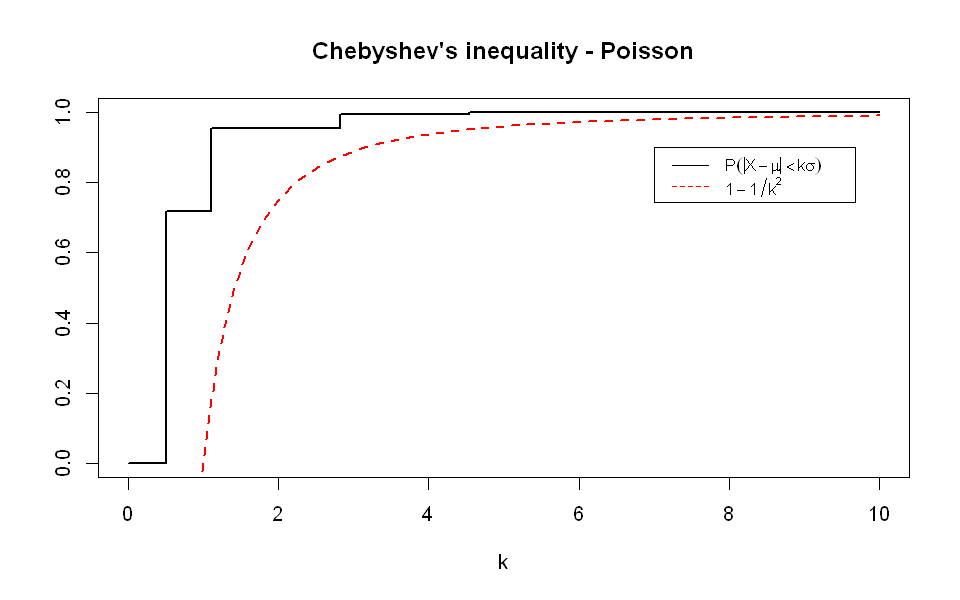

In [20]:
sigma <- sqrt(1/3)
xs = seq(0, 10, length.out=100)
plot(xs, lhs(function(x) ppois(x, lambda=1/3), xs, 1/3, sigma), "S", col='black', xlab='k', ylab='', lwd=2,
     main = "Chebyshev's inequality - Poisson")
curve(1 - 1/(x^2), from=0, to=10, lwd=2, col = 'red', lty=2, add=TRUE)

legend(7, 0.9, legend=c(expression(P(abs(X- mu) < k * sigma)), expression(1 - 1/k^2)),
       col=c("black", "red"), lty=c(1,2), cex=0.8, y.intersp=1.5)